### Exploring IMDB data

In [15]:
%matplotlib inline
from imp import reload
import itertools
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, MaxPooling1D, Convolution1D
from keras.layers.embeddings import Embedding

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from IPython.display import Image

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)


In [4]:
# load the dataset
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [5]:
print("Classes: ")
print(np.unique(y))
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Classes: 
[0 1]
Number of words: 
4998


In order to set a proper max sequence length, we need to go througth the property of the data and see the length distribution of each sentence in the dataset. A box and whisker plot is shown below for reviewing the length distribution in words.

Review length: 
Mean 234.76 words (172.911495)


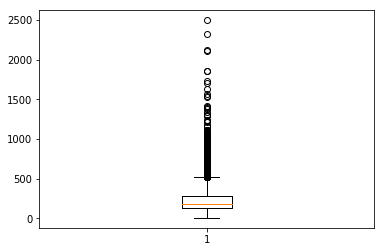

In [6]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

Looking the box and whisker plot, the max length of a sample in words is 500, and the mean and median are below 250. 

Preprocessing

Sequence Padding

In [7]:
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train,maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)

### LSTM analysis

In [8]:
# create the model

model = Sequential()
model.add(Embedding(5000, 32, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 399s 16ms/step - loss: 0.4428 - acc: 0.7894 - val_loss: 0.3862 - val_acc: 0.8305
Epoch 2/3
25000/25000 [==============================] - 389s 16ms/step - loss: 0.3036 - acc: 0.8774 - val_loss: 0.3584 - val_acc: 0.8505
Epoch 3/3
25000/25000 [==============================] - 398s 16ms/st

In [9]:

scores =  model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.00%


In [10]:
y_predict= model.predict(X_test)
y_predict = (y_predict >= 0.5)
print (classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87     12500
          1       0.89      0.85      0.87     12500

avg / total       0.87      0.87      0.87     25000



### Creating a model with convolutional layer with an LSTM layer 

In [12]:
top_words = 6000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [13]:
x_train = sequence.pad_sequences(X_train, maxlen=500)
x_test = sequence.pad_sequences(X_test, maxlen=500)

In [16]:
model = Sequential()
model.add(Embedding(top_words,64, dropout=0.2))
model.add(Convolution1D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

C:\Users\saura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          384000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 495,297
Trainable params: 495,297
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.fit(x_train,y_train, epochs=5, batch_size=128)

Epoch 1/5
25000/25000 [==============================] - 335s 13ms/step - loss: 0.4878 - acc: 0.7442
Epoch 2/5
25000/25000 [==============================] - 340s 14ms/step - loss: 0.3243 - acc: 0.8658
Epoch 3/5
25000/25000 [==============================] - 348s 14ms/step - loss: 0.2477 - acc: 0.9030
Epoch 4/5
25000/25000 [==============================] - 353s 14ms/step - loss: 0.2103 - acc: 0.9192
Epoch 5/5
25000/25000 [==============================] - 352s 14ms/step - loss: 0.1853 - acc: 0.9298


In [18]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.96%


As we can see the accuracy is higher in this case and dimensionality is also less

## CNN

In [23]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [24]:
# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

print('Train data size:', x_train.shape)
print('Test data size:', x_test.shape)

Train data size: (25000, 500)
Test data size: (25000, 500)


In [25]:
model = Sequential()
model.add(Embedding(5000,32,input_length=500))
model.add(Dropout(0.2))
model.add(Conv1D(250,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 498, 250)          24250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

In [26]:
model.fit(x_train, y_train,batch_size=64,epochs=4,validation_data=(x_test, y_test),verbose=1)


Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 282s 11ms/step - loss: 0.4560 - acc: 0.7592 - val_loss: 0.2879 - val_acc: 0.8785
Epoch 2/4
25000/25000 [==============================] - 280s 11ms/step - loss: 0.2560 - acc: 0.8966 - val_loss: 0.2591 - val_acc: 0.8916
Epoch 3/4
25000/25000 [==============================] - 330s 13ms/step - loss: 0.1880 - acc: 0.9272 - val_loss: 0.2923 - val_acc: 0.8801
Epoch 4/4
25000/25000 [==============================] - 513s 21ms/step - loss: 0.1438 - acc: 0.9465 - val_loss: 0.2743 - val_acc: 0.8914


In [29]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 89.14%


In [30]:
y_predict= model.predict(x_test)
y_predict = (y_predict >= 0.5)
print (classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.90      0.88      0.89     12500
          1       0.88      0.90      0.89     12500

avg / total       0.89      0.89      0.89     25000



## Best Accuracy : 89.14%